## Appendix A

In [ ]:
!pip3 install numpy opencv-python matplotlib scikit-learn

In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA


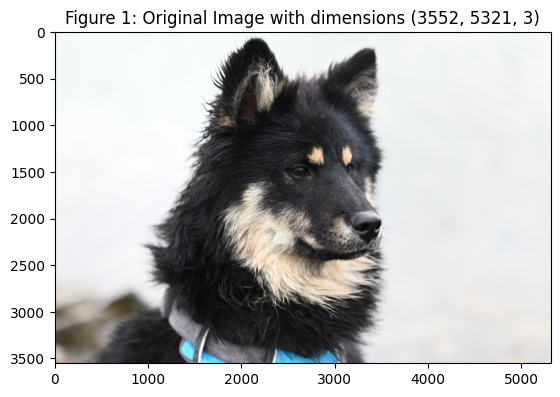

In [9]:
# Load the original image in RGB format
img_path = '../assets/dog.jpg'
org_img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

plt.title(f'Figure 1: Original Image with dimensions {org_img.shape}')
plt.imshow(org_img)

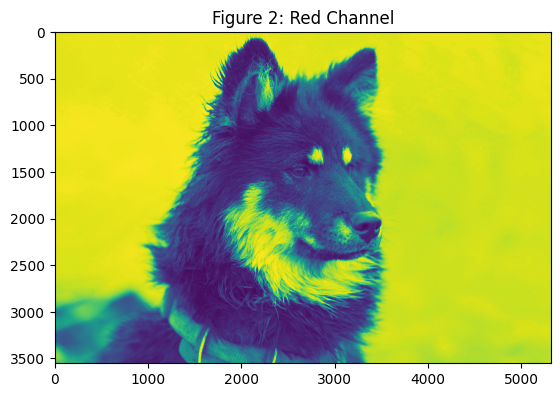

In [ ]:
# Split the image into R, G, B channels
r, g, b = cv2.split(org_img)


plt.title('Figure 2: Red Channel')
plt.imshow(r)

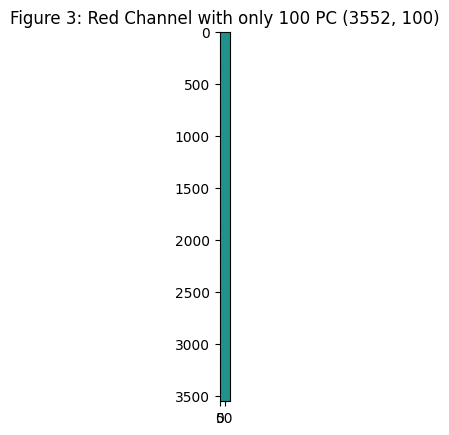

In [16]:
# Set the number of principal components for PCA
num_pc = 100  # Adjust based on testing to balance quality and compression

# Apply PCA to each channel
pca_r = PCA(n_components=num_pc)
r_reduced = pca_r.fit_transform(r)
r_reconstructed = pca_r.inverse_transform(r_reduced)

pca_g = PCA(n_components=num_pc)
g_reduced = pca_g.fit_transform(g)
g_reconstructed = pca_g.inverse_transform(g_reduced)

pca_b = PCA(n_components=num_pc)
b_reduced = pca_b.fit_transform(b)
b_reconstructed = pca_b.inverse_transform(b_reduced)


plt.title(f'Figure 3: Red Channel with only 100 PC {r_reduced.shape}')
plt.imshow(r_reduced)


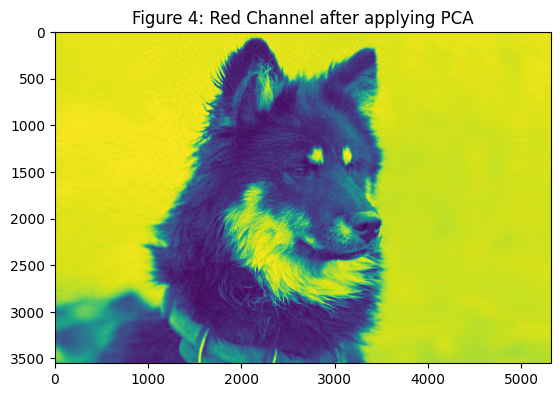

In [19]:
# Clip values to ensure they are within the valid range [0, 255]
r_reconstructed = np.clip(r_reconstructed, 0, 255).astype(np.uint8)
g_reconstructed = np.clip(g_reconstructed, 0, 255).astype(np.uint8)
b_reconstructed = np.clip(b_reconstructed, 0, 255).astype(np.uint8)


plt.title(f'Figure 4: Red Channel after applying PCA')
plt.imshow(r_reconstructed)

Original Size: 1183.70 KB
Compressed Size: 669.94 KB
Size is reduced by: 43.40%


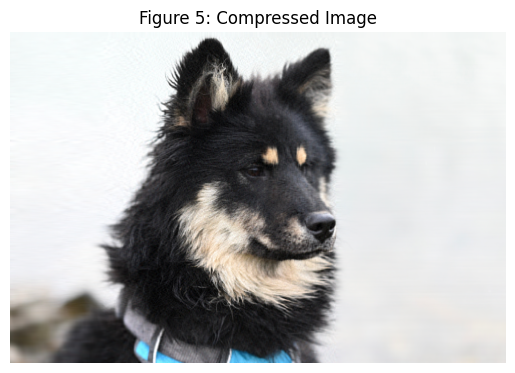

In [22]:
# Merge the reconstructed channels back into an RGB image
comp_img_rgb = cv2.merge([r_reconstructed, g_reconstructed, b_reconstructed])

plt.title(f'Figure 5: Compressed Image')
plt.axis('off')
plt.imshow(comp_img_rgb)

# Define the save path
save_path = '../processed_images/dog_compressed_colored.jpg'

# Save the compressed image with moderate JPEG quality
cv2.imwrite(save_path, cv2.cvtColor(comp_img_rgb, cv2.COLOR_RGB2BGR), [int(cv2.IMWRITE_JPEG_QUALITY), 60])

# Display sizes to compare
original_size = os.path.getsize(img_path) / 1024  # Original size in KB
compressed_size = os.path.getsize(save_path) / 1024  # Compressed size in KB
print(f"Original Size: {original_size:.2f} KB")
print(f"Compressed Size: {compressed_size:.2f} KB")
print(f"Size is reduced by: {(100-(compressed_size*100)/original_size):.2f}%")
